In [1]:
###
import os
###
import numpy as np
### Interpolation library
import scipy.interpolate as interpolate
###
import matplotlib.pylab as plt
###
from matplotlib.animation import FuncAnimation
###
from PIL import Image, ImageDraw
import imageio.v2 as imageio

In [7]:
# Defining all mass #in kg
MSun= 1.989e30
MEarth= 5.972e24
MMoon= 7.34767309e22

# Defining distance to sun #in meters
DEarth = 151.4e9
DMoon = 384000000

# Define G
G=6.6743e-11

# Angular frequency and orbital period
w=np.sqrt(G*MEarth*MMoon/DMoon**3)

T= 2*np.pi/w

Text(0.5, 1.0, 'Moon Orbit')

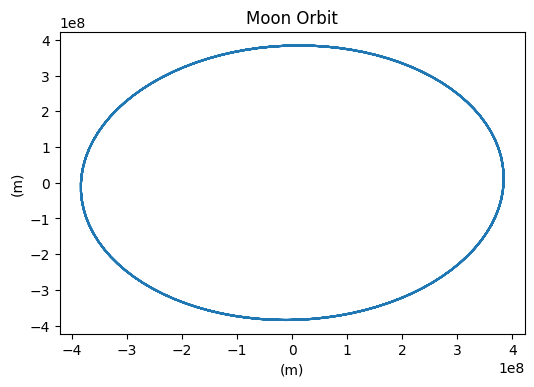

In [8]:
# Initial parameters
# Descritize the step according to the orbital period


runtime=5*T
dt = 0.01*T
n=int (runtime/dt) +1

X0 = DMoon
Vx0 = 0

X = []
Vx= []
X.append(X0)
Vx.append(Vx0)

Y0 = 0
Vy0 = w*DMoon

Y = []
Vy= []
Y.append(Y0)
Vy.append(Vy0)

##################

for i in range (n):
    
    X_nplus1 = X[-1] + dt*Vx[-1]
    Y_nplus1 = Y[-1] + dt*Vy[-1]
    
    X.append(X_nplus1)
    Y.append(Y_nplus1)
    
    # defining r
    r = np.sqrt(X[-1]**2 + Y[-1]**2)
    
    Vx_nplus1 = Vx[-1] - dt*G*MEarth*MMoon*X[-1]/DMoon**3
    Vy_nplus1 = Vy[-1] - dt*G*MEarth*MMoon*Y[-1]/DMoon**3
    
    Vx.append(Vx_nplus1)
    Vy.append(Vy_nplus1)

plt.figure (dpi=100)
plt.plot(X, Y)
plt.xlabel('(m)')
plt.ylabel('(m)')
plt.title ('Moon Orbit')

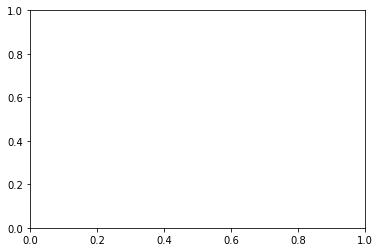

In [9]:
fig, ax= plt.subplots()
frames=[]
ax.set_xlim(min(X),max(X))
ax.set_ylim(min(Y),max(Y))

for i in range (len(X)):
    ax.plot(X[:i+1], Y[:i+1], 'b-')  # Plot the data up to the current frame
    ax.plot(X[i], Y[i], 'ro')  # Plot the current point as a red dot
    ax.set_title('Moon orbit')
    # Save the current frame as an image
    filename = f"frame_{i:00f}.png"  # Define the filename with a three-digit frame number
    plt.savefig(filename)
    frames.append(imageio.imread(filename))

    # Clear the plot for the next frame
    ax.cla()

# Remove the temporary image files
for filename in os.listdir():
    if filename.startswith("frame_") and filename.endswith(".png"):
        os.remove(filename)

In [10]:
# Save image in the folder of the notebook

output_file = "animation.gif"
imageio.mimsave(output_file, frames,
    duration=0.5)# Adjust the duration between frames as needed